# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Function-affine" data-toc-modified-id="Function-affine-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Function affine</a></div><div class="lev2 toc-item"><a href="#Synopse" data-toc-modified-id="Synopse-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Synopse</a></div><div class="lev2 toc-item"><a href="#Description" data-toc-modified-id="Description-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Description</a></div><div class="lev2 toc-item"><a href="#Examples" data-toc-modified-id="Examples-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Examples</a></div><div class="lev3 toc-item"><a href="#Example-1" data-toc-modified-id="Example-1-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Example 1</a></div><div class="lev3 toc-item"><a href="#Example-2" data-toc-modified-id="Example-2-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Example 2</a></div><div class="lev3 toc-item"><a href="#Example-3" data-toc-modified-id="Example-3-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Example 3</a></div><div class="lev3 toc-item"><a href="#Example-4" data-toc-modified-id="Example-4-134"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Example 4</a></div><div class="lev2 toc-item"><a href="#Equation" data-toc-modified-id="Equation-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Equation</a></div><div class="lev2 toc-item"><a href="#See-Also" data-toc-modified-id="See-Also-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>See Also</a></div><div class="lev2 toc-item"><a href="#Contributions" data-toc-modified-id="Contributions-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Contributions</a></div>

# Function affine

## Synopse

Affine transform.

- **g = affine(f, T, domain)**

  - **g**: Image. 


  - **f**: Image. 
  - **T**: Image. Affine matrix for the geometric transformation.
  - **domain**: Output Image domain. Optional. Default is domain of the input f.
  

In [28]:
import numpy as np

def affine(f,T,domain=0): 

    if np.sum(domain) == 0: 
        domain = f.shape
        n = f.size
    if len(f.shape) == 2:
        H,W = f.shape
        y1,x1 = np.indices(domain)

        yx1 = np.array([ y1.ravel(), 
                         x1.ravel(), 
                         np.ones(n)])
        yx_float = np.linalg.inv(T).dot(yx1)
        yy = np.rint(yx_float[0]).astype(int)
        xx = np.rint(yx_float[1]).astype(int)

        y = np.clip(yy,0,H-1).reshape(domain)
        x = np.clip(xx,0,W-1).reshape(domain)

        g = f[y,x]

    if len(f.shape) == 3: 
        D,H,W = f.shape 
        z1,y1,x1 = np.indices(domain)
        zyx1 = np.array([ z1.ravel(), 
                          y1.ravel(), 
                          x1.ravel(), 
                          np.ones(n)])
        zyx_float = np.linalg.inv(T).dot(zyx1)

        zz = np.rint(zyx_float[0]).astype(int)
        yy = np.rint(zyx_float[1]).astype(int)
        xx = np.rint(zyx_float[2]).astype(int)

        z = np.clip(zz, 0, D-1).reshape(domain) #z
        y = np.clip(yy, 0, H-1).reshape(domain) #rows
        x = np.clip(xx, 0, W-1).reshape(domain) #columns

        g = f[z,y,x]

    return g

## Description

Perform the affine transformation of an image in 2D or 3D.

In [1]:
testing = (__name__ == "__main__")
if testing:
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

## Examples

### Example 1
    

In [2]:
if testing:
    scale = [2,0.5]
    theta = np.pi/2
    t = [2,1]

    Ts   = [[scale[1],0,0], 
            [0,scale[0],0], 
            [0,0,1]]
    Trot = [[np.cos(theta),-np.sin(theta),0], 
            [np.sin(theta),np.cos(theta),0], 
            [0,0,1]]
    Tx   = [[1,0,t[1]], 
            [0,1,t[0]], 
            [0,0,1]]

    f = np.array([[1,2,3,4,5],
                  [6,7,8,9,10],
                  [11,12,13,14,15]])
    print('Original matrix:','\n')
    print(f,'\n')
    g = ia.affine(f,Ts)
    print('Result with scale:','\n')
    print(g,'\n')

    g = ia.affine(f,Trot)
    print('Result with rotation:','\n')
    print(g,'\n')

    g = ia.affine(f,Tx)
    print('Result:','\n')
    print(g,'\n')

Original matrix: 

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]] 

Result with scale: 

[[ 1  1  2  3  3]
 [11 11 12 13 13]
 [11 11 12 13 13]] 

Result with rotation: 

[[ 1  6 11 11 11]
 [ 1  6 11 11 11]
 [ 1  6 11 11 11]] 

Result: 

[[1 1 1 2 3]
 [1 1 1 2 3]
 [6 6 6 7 8]] 



### Example 2


[[   0.70710678   -0.70710678  128.        ]
 [   0.70710678    0.70710678  128.        ]
 [   0.            0.            1.        ]]


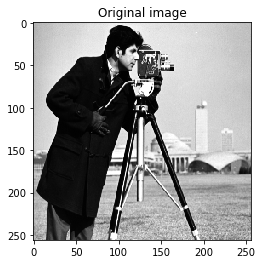

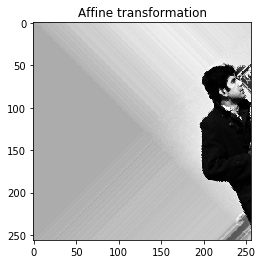

In [16]:
if testing:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    f = mpimg.imread('../data/cameraman.tif')
    theta = np.pi/4
    scale = [1,1]
    t = [128,128]

    Ts   = np.array([[scale[1],0,0], [0,scale[0],0], [0,0,1]])                                     #Scale
    Trot = np.array([[np.cos(theta),-np.sin(theta),0], [np.sin(theta),np.cos(theta),0], [0,0,1]])  #Rotation
    Tx   = np.array([[1,0,t[1]], [0,1,t[0]], [0,0,1]])                                             #Translation

    T = (Tx.dot(Trot)).dot(Ts)
    print(T)
    g = ia.affine(f,T)
    plt.figure(1)
    plt.imshow(f, cmap='gray'), plt.title("Original image");
    plt.figure(2)
    plt.imshow(g, cmap='gray'), plt.title("Affine transformation");
    plt.show()


### Example 3

In [10]:
if testing:
    f = np.array([[[0,1,3],
                   [2,3,1],
                   [1,2,1]],
                  [[4,5,6],
                   [6,7,3],
                   [4,5,6]]])

    print("f:\n",f)
    print("shape f\n",f.shape)

    Trx = np.array([[1,0,0,0],[0,np.cos(np.pi/2),np.sin(np.pi/2),0],[0,-np.sin(np.pi/2),np.cos(np.pi/2),0],[0,0,0,1]],'d')
    g = ia.affine(f,Trx)
    print("Rotation in X:\n",g)

    Try = np.array([[np.cos(np.pi/2),0,-np.sin(np.pi/2),0],[0,1,0,0],[np.sin(np.pi/2),0,np.cos(np.pi/2),0],[0,0,0,1]],'d')    
    g = ia.affine(f,Try)
    print("Rotation in Y:\n",g)

    Trz = np.array([[np.cos(np.pi/2),np.sin(np.pi/2),0,0],[-np.sin(np.pi/2),np.cos(np.pi/2),0,0],[0,0,1,0],[0,0,0,1]],'d') 
    g = ia.affine(f,Trz)
    print("Rotation in Z:\n",g)

f:
 [[[0 1 3]
  [2 3 1]
  [1 2 1]]

 [[4 5 6]
  [6 7 3]
  [4 5 6]]]
shape f
 (2, 3, 3)
Rotation in X:
 [[[0 0 0]
  [1 1 1]
  [3 3 3]]

 [[4 4 4]
  [5 5 5]
  [6 6 6]]]
Rotation in Y:
 [[[0 4 4]
  [2 6 6]
  [1 4 4]]

 [[0 4 4]
  [2 6 6]
  [1 4 4]]]
Rotation in Z:
 [[[0 1 3]
  [0 1 3]
  [0 1 3]]

 [[2 3 1]
  [2 3 1]
  [2 3 1]]]


### Example 4

## Equation

$$ \begin{matrix}
    \begin{bmatrix}
    x{}'\\ 
    y{}'\\ 
    z{}'\\ 
    1
    \end{bmatrix} & = & \begin{bmatrix}
    A &B  &C  &D \\ 
    F &G  &G  &I \\ 
    J &K  &L  &M \\ 
    0 &0  &0  &1 
    \end{bmatrix}\begin{bmatrix}
    x\\ 
    y\\ 
    z\\ 
    1
    \end{bmatrix}
    \\
    g(x{}',y{}',z{}')  &=&  f(T^{-1}(x{},y{},z{}))
    \end{matrix}
$$

## See Also

- `affine3` - Geometric affine transformation with interpolation

## Contributions

- Fernando Paolieri Neto, April 2009
- Jan Beeck, 1st semester 2011

In [11]:
if testing:
    print('testing affine')
    f = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
    T = np.array([[1,0,0],[0,1,0],[0,0,1]], 'd')
    print(repr(ia.affine(f,T)) == repr(np.array(
          [[ 1,  2,  3,  4,  5],
           [ 6,  7,  8,  9, 10],
           [11, 12, 13, 14, 15]])))
    T[1,1] = 0.5
    print(repr(ia.affine(f,T)) == repr(np.array(
          [[ 1,  3,  5,  5,  5],
           [ 6,  8, 10, 10, 10],
           [11, 13, 15, 15, 15]])))

testing affine
True
True
